In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

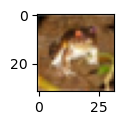

In [9]:
plot_sample(0)

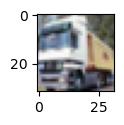

In [10]:
plot_sample(1)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[y_train[3][0]]

'deer'

In [13]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255



In [14]:
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [16]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [19]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3062 - loss: 1.9327
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4238 - loss: 1.6417
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4571 - loss: 1.5417
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4768 - loss: 1.4925
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4921 - loss: 1.4355
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5078 - loss: 1.3890
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5269 - loss: 1.3482
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5377 - loss: 1.3150
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5491 - loss: 1.2769
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5600 - loss: 1.2525


In [25]:
np.argmax(model.predict(X_test_scaled)[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


3

In [27]:
y_test[0]


array([3], dtype=uint8)